### Take two 3D coordinates from the user. Find out the distance between these points using following distance functions.

In [36]:
import numpy as np

def euclidean_distance(x, y):
    return np.sqrt(np.sum((x-y)**2))

def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

def minkowski_distance(x, y, p):
    return np.power(np.sum(np.power(np.abs(x - y), p)), 1/p)

# Function to take input vectors
def input_coordinates(dim):
    vector = []
    for i in range(dim):
        value = float(input(f"Enter value for dimension {i+1}: "))
        vector.append(value)
    return np.array(vector)

# Define the dimensionality of the vectors
dim = 3

# Take two 3D coordinates from the user
print("Enter the first 3D coordinate:")
x = input_coordinates(dim)
print("Enter the second 3D coordinate:")
y = input_coordinates(dim)


# Calculate distances
euclidean_dist = euclidean_distance(x, y)
manhattan_dist = manhattan_distance(x, y)
minkowski_dist = minkowski_distance(x, y, 2)  # Using p=2 for Euclidean distance

# Print the results
print(f"Euclidean Distance: {euclidean_dist}")
print(f"Manhattan Distance: {manhattan_dist}")
print(f"Minkowski Distance (p=2): {minkowski_dist}")


Enter the first 3D coordinate:
Enter value for dimension 1: 1
Enter value for dimension 2: 2
Enter value for dimension 3: 3
Enter the second 3D coordinate:
Enter value for dimension 1: 1
Enter value for dimension 2: 1
Enter value for dimension 3: 1
Euclidean Distance: 2.23606797749979
Manhattan Distance: 3.0
Minkowski Distance (p=2): 2.23606797749979


### Import the Iris dataset. Write a program to obtain the Euclidian Distance Matrix for all the data samples in the feature space. Distance metric is a 2D array, where the(i,j)th entry represents the distance between the ith and jth sample points in the feature space.

In [16]:
from sklearn.datasets import load_iris
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (data samples)

# Euclidean distance between two points
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Euclidean Distance Matrix
def euclidean_distance_matrix(X):
    n_samples = len(X)
    distance_matrix = np.zeros((n_samples, n_samples))  # Initialize distance matrix
    
    # Distances and fill the matrix
    for i in range(n_samples):
        for j in range(n_samples):
            distance_matrix[i, j] = euclidean_distance(X[i], X[j])
    
    return distance_matrix

# Euclidean Distance Matrix
distance_metric = euclidean_distance_matrix(X)

# Print the distance matrix
print("Euclidean Distance Matrix:")
print(distance_metric)


2.23606797749979
Euclidean Distance Matrix:
[[0.         0.53851648 0.50990195 ... 4.45982062 4.65080638 4.14004831]
 [0.53851648 0.         0.3        ... 4.49888875 4.71805044 4.15331193]
 [0.50990195 0.3        0.         ... 4.66154481 4.84871117 4.29883705]
 ...
 [4.45982062 4.49888875 4.66154481 ... 0.         0.6164414  0.64031242]
 [4.65080638 4.71805044 4.84871117 ... 0.6164414  0.         0.76811457]
 [4.14004831 4.15331193 4.29883705 ... 0.64031242 0.76811457 0.        ]]


### Import the Iris dataset. Prepare a dataset considering samples belong to any two output classes. Draw the scatter plot for all the samples in the new dataset consideringany two input attributes. Examine the scatter plot to find the equation of a line thatcan separate sample of two classes.

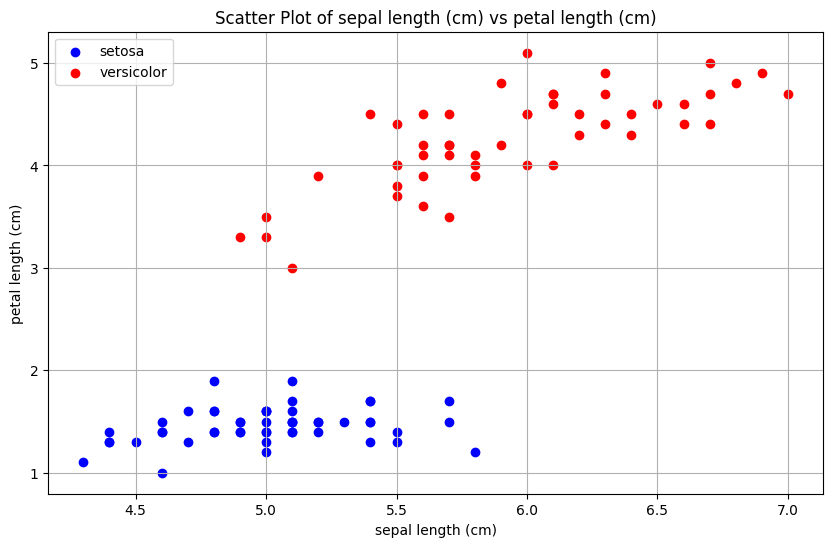

The equation of the line separating setosa and versicolor classes is: 
petal length (cm) = -0.14*sepal length (cm) + 0.15


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Map target classes to their respective names
iris_df['species'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Choose two classes
class1 = 'setosa'
class2 = 'versicolor'

# Prepare dataset with samples from the chosen classes
subset_df = iris_df[(iris_df['species'] == class1) | (iris_df['species'] == class2)]

# Choose two input attributes for scatter plot
x_attribute = 'sepal length (cm)'
y_attribute = 'petal length (cm)'

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(subset_df[subset_df['species'] == class1][x_attribute],
            subset_df[subset_df['species'] == class1][y_attribute],
            color='blue', label=class1)

plt.scatter(subset_df[subset_df['species'] == class2][x_attribute],
            subset_df[subset_df['species'] == class2][y_attribute],
            color='red', label=class2)
plt.xlabel(x_attribute)
plt.ylabel(y_attribute)
plt.title(f'Scatter Plot of {x_attribute} vs {y_attribute}')
plt.legend()
plt.grid(True)
plt.show()

# Extracting data for linear regression
X = subset_df[[x_attribute, y_attribute]].values
y = subset_df['species'].map({class1: 0, class2: 1}).values

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Coefficients of the line (slope and intercept)
slope = model.coef_[0]
intercept = model.intercept_

# Print the equation of the line
print(f"The equation of the line separating {class1} and {class2} classes is: ")
print(f"{y_attribute} = {slope:.2f}*{x_attribute} + {intercept:.2f}")